### 8. Non-linear Basis Functions
#### 8.2 Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.linalg import inv, pinv
from sklearn.model_selection import train_test_split


class SinusoidalRegressor:
    def __init__(self):
        self.k = None
        self.weights = None

    def phi(self, x):
        # The basis function for a general 2k
        phi_x = np.ones((x.shape[0], 2 * self.k + 1))
        for i in range(1, self.k + 1):
            phi_x[:, 2 * i - 1] = np.sin(i * x)
            phi_x[:, 2 * i] = np.cos(i * x)
        return phi_x

    def fit(self, X_train, Y_train, k):
        self.k = k
        # Construct the design matrix Phi for all data points in X_train
        Phi = self.phi(X_train)
        # Solve for the weights using the normal equation with a pseudo-inverse
        self.weights = pinv(Phi.T @ Phi) @ Phi.T @ Y_train

    def predict(self, X):
        # Check if the model is fitted
        if self.weights is None:
            raise ValueError("Model is not fitted yet.")
        # Apply the learned model
        Phi = self.phi(X)
        return Phi @ self.weights

    def rmse(self, X_val, Y_val):
        # Predict the values for X_val
        Y_pred = self.predict(X_val)
        # Calculate the RMSE
        return np.sqrt(np.mean((Y_val - Y_pred) ** 2))
    

np.random.seed(61)
csv_file = 'nonlinear-regression-data.csv'
data = pd.read_csv(csv_file)
x = np.array(data['X'])
y = np.array(data['Noisy_y'])

In [2]:
### Evaluation Part 0 #################################################################################

# Split the data
X_train, X_val, Y_train, Y_val = train_test_split(x, y, train_size=45, test_size=16, random_state=42)


### Evaluation Part 1 and 2 #################################################################################

# Initialize the model
model = SinusoidalRegressor()

train_errors = []
val_errors = []
k_values = range(1, 11)

for k in k_values:
    model.fit(X_train, Y_train, k)
    train_rmse = model.rmse(X_train, Y_train)
    val_rmse = model.rmse(X_val, Y_val)
    train_errors.append(train_rmse)
    val_errors.append(val_rmse)

# Find k values that give the minimum training and validation errors
k_min_train = k_values[train_errors.index(min(train_errors))]
k_min_val = k_values[val_errors.index(min(val_errors))]

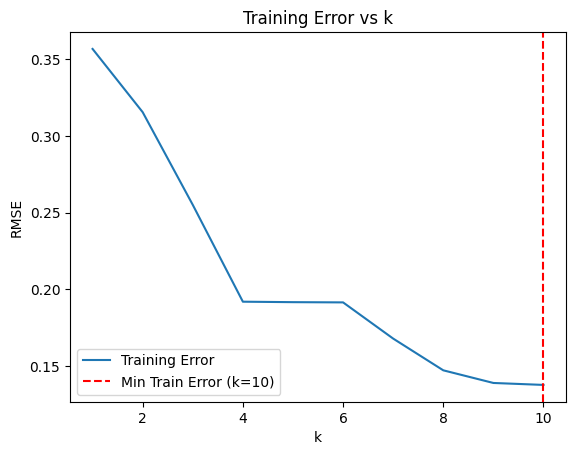

In [4]:
# Plotting the training error versus k
plt.figure()
plt.plot(k_values, train_errors, label='Training Error')
plt.axvline(x=k_min_train, color='r', linestyle='--', label=f'Min Train Error (k={k_min_train})')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.title('Training Error vs k')
plt.legend()
plt.show()

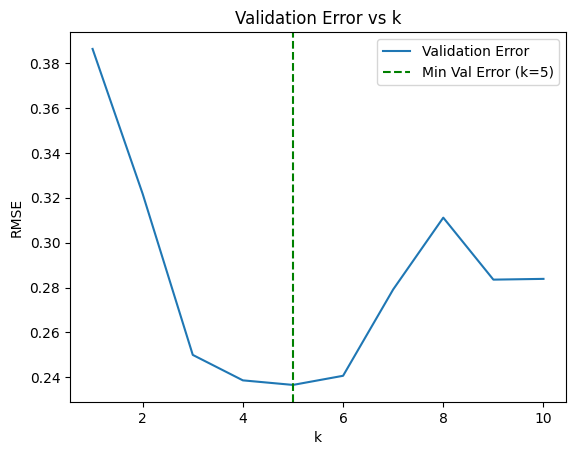

In [5]:
# Plotting the validation error versus k
plt.figure()
plt.plot(k_values, val_errors, label='Validation Error')
plt.axvline(x=k_min_val, color='g', linestyle='--', label=f'Min Val Error (k={k_min_val})')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.title('Validation Error vs k')
plt.legend()
plt.show()

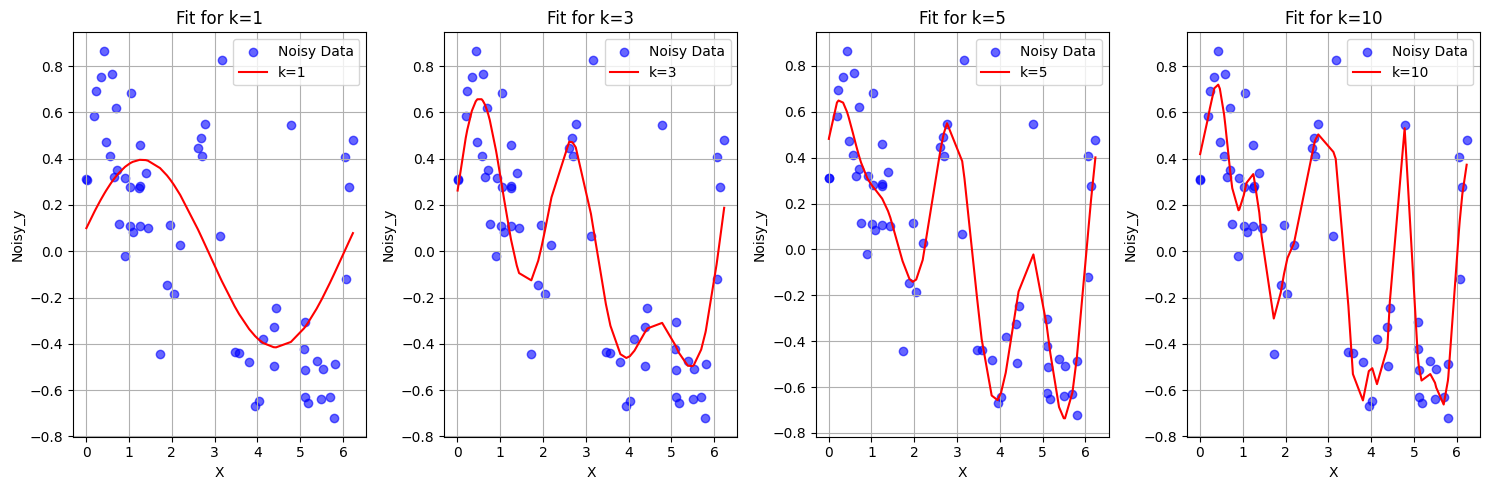

In [6]:
### Evaluation Part 4 #################################################################################
# You will create separate plots for each k you can use plt.subplots function
k_values = [1, 3, 5, 10]
fig, axes = plt.subplots(1, len(k_values), figsize=(15, 5))

for i, k in enumerate(k_values):
    model.fit(x, y, k)
    y_pred = model.predict(x)

    axes[i].scatter(x, y, label='Noisy Data', color='blue', alpha=0.6)
    axes[i].plot(x, y_pred, label=f'k={k}', color='red')
    axes[i].set_xlabel('X')
    axes[i].set_ylabel('Noisy_y')
    axes[i].set_title(f'Fit for k={k}')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()